IMPORTY

In [47]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

WCZYTYWANIE DANYCH

In [3]:
data = pd.read_csv('Europe Hotel Booking Satisfaction Score.csv',sep=',')
train,test = train_test_split(data,test_size = 0.2)

In [4]:
train

,id,Gender,Age,purpose_of_travel,Type of Travel,Type Of Booking,Hotel wifi service,Departure/Arrival convenience,Ease of Online booking,Hotel location,Food and drink,Stay comfort,Common Room entertainment,Checkin/Checkout service,Other service,Cleanliness,satisfaction
38494,810,Male,26,academic,Group Travel,Group bookings,3,1,3,3,3,3,3,3,3,3,neutral or dissatisfied
87100,38212,Female,45,business,Group Travel,Not defined,3,4,4,4,5,4,4,1,4,3,satisfied
13128,17153,Female,31,personal,Group Travel,Group bookings,5,5,5,5,5,5,5,5,4,5,satisfied
42577,96185,Male,47,tourism,Group Travel,Group bookings,3,3,3,3,4,4,5,3,5,5,satisfied
22721,41550,Male,54,business,Group Travel,Individual/Couple,3,3,3,3,1,1,1,1,3,1,neutral or dissatisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52884,52581,Female,56,academic,Group Travel,Group bookings,3,3,3,3,2,4,4,4,4,2,satisfied
49,82042,Male,21,tourism,Personal Travel,Individual/Couple,2,2,2,3,5,5,5,1,3,5,neutral or dissatisfied
100803,56575,Female,46,business,Group Travel,Group bookings,5,5,5,5,4,5,4,5,4,4,satisfied
21084,54411,Female,41,tourism,Group Travel,Individual/Couple,4,5,5,5,4,4,4,3,3,4,satisfied


In [5]:
test

,id,Gender,Age,purpose_of_travel,Type of Travel,Type Of Booking,Hotel wifi service,Departure/Arrival convenience,Ease of Online booking,Hotel location,Food and drink,Stay comfort,Common Room entertainment,Checkin/Checkout service,Other service,Cleanliness,satisfaction
15519,59097,Male,10,business,Personal Travel,Individual/Couple,4,0,4,3,4,2,4,2,5,2,neutral or dissatisfied
38277,87114,Female,33,tourism,Personal Travel,Individual/Couple,4,1,4,4,4,4,4,3,4,4,satisfied
95612,118861,Male,35,academic,Personal Travel,Not defined,2,3,2,3,3,3,3,1,1,3,neutral or dissatisfied
11332,62552,Female,26,aviation,Group Travel,Group bookings,2,2,2,4,4,4,4,4,4,4,neutral or dissatisfied
13212,86938,Female,36,business,Group Travel,Group bookings,3,5,5,5,4,3,3,3,3,1,neutral or dissatisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86427,126414,Female,47,academic,Group Travel,Group bookings,4,4,4,4,4,5,5,4,5,4,satisfied
66044,71014,Female,60,academic,Group Travel,Group bookings,4,1,4,4,3,5,5,5,5,3,satisfied
39667,39673,Female,42,tourism,Personal Travel,Not defined,1,2,2,2,4,2,3,1,3,3,neutral or dissatisfied
69159,1957,Male,21,personal,Group Travel,Individual/Couple,3,0,3,4,4,4,4,2,3,4,neutral or dissatisfied


PRZETWARZANIE DANYCH

<AxesSubplot:xlabel='satisfaction', ylabel='count'>

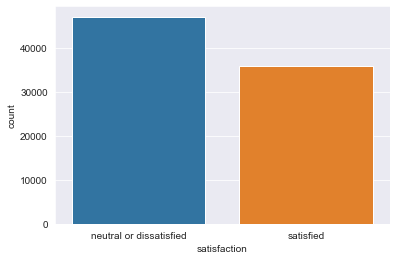

In [6]:
sns.countplot(data=train,x='satisfaction')

In [7]:
print(train.isnull().sum())

id                                0
Gender                            0
Age                               0
purpose_of_travel                 0
Type of Travel                    0
Type Of Booking                   0
Hotel wifi service                0
Departure/Arrival  convenience    0
Ease of Online booking            0
Hotel location                    0
Food and drink                    0
Stay comfort                      0
Common Room entertainment         0
Checkin/Checkout service          0
Other service                     0
Cleanliness                       0
satisfaction                      0
dtype: int64


In [8]:
print(test.isnull().sum())

id                                0
Gender                            0
Age                               0
purpose_of_travel                 0
Type of Travel                    0
Type Of Booking                   0
Hotel wifi service                0
Departure/Arrival  convenience    0
Ease of Online booking            0
Hotel location                    0
Food and drink                    0
Stay comfort                      0
Common Room entertainment         0
Checkin/Checkout service          0
Other service                     0
Cleanliness                       0
satisfaction                      0
dtype: int64


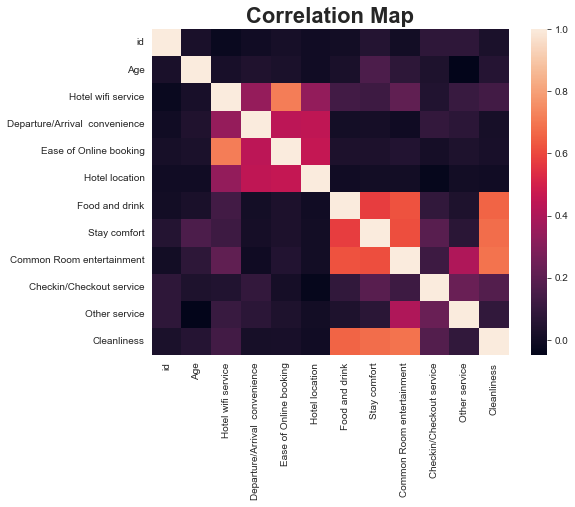

In [9]:
corr_df = data.corr()
fig, axs = plt.subplots(figsize=(8, 6))
ax=sns.heatmap(corr_df).set_title("Correlation Map",fontdict= { 'fontsize': 22, 'fontweight':'bold'})
plt.show()

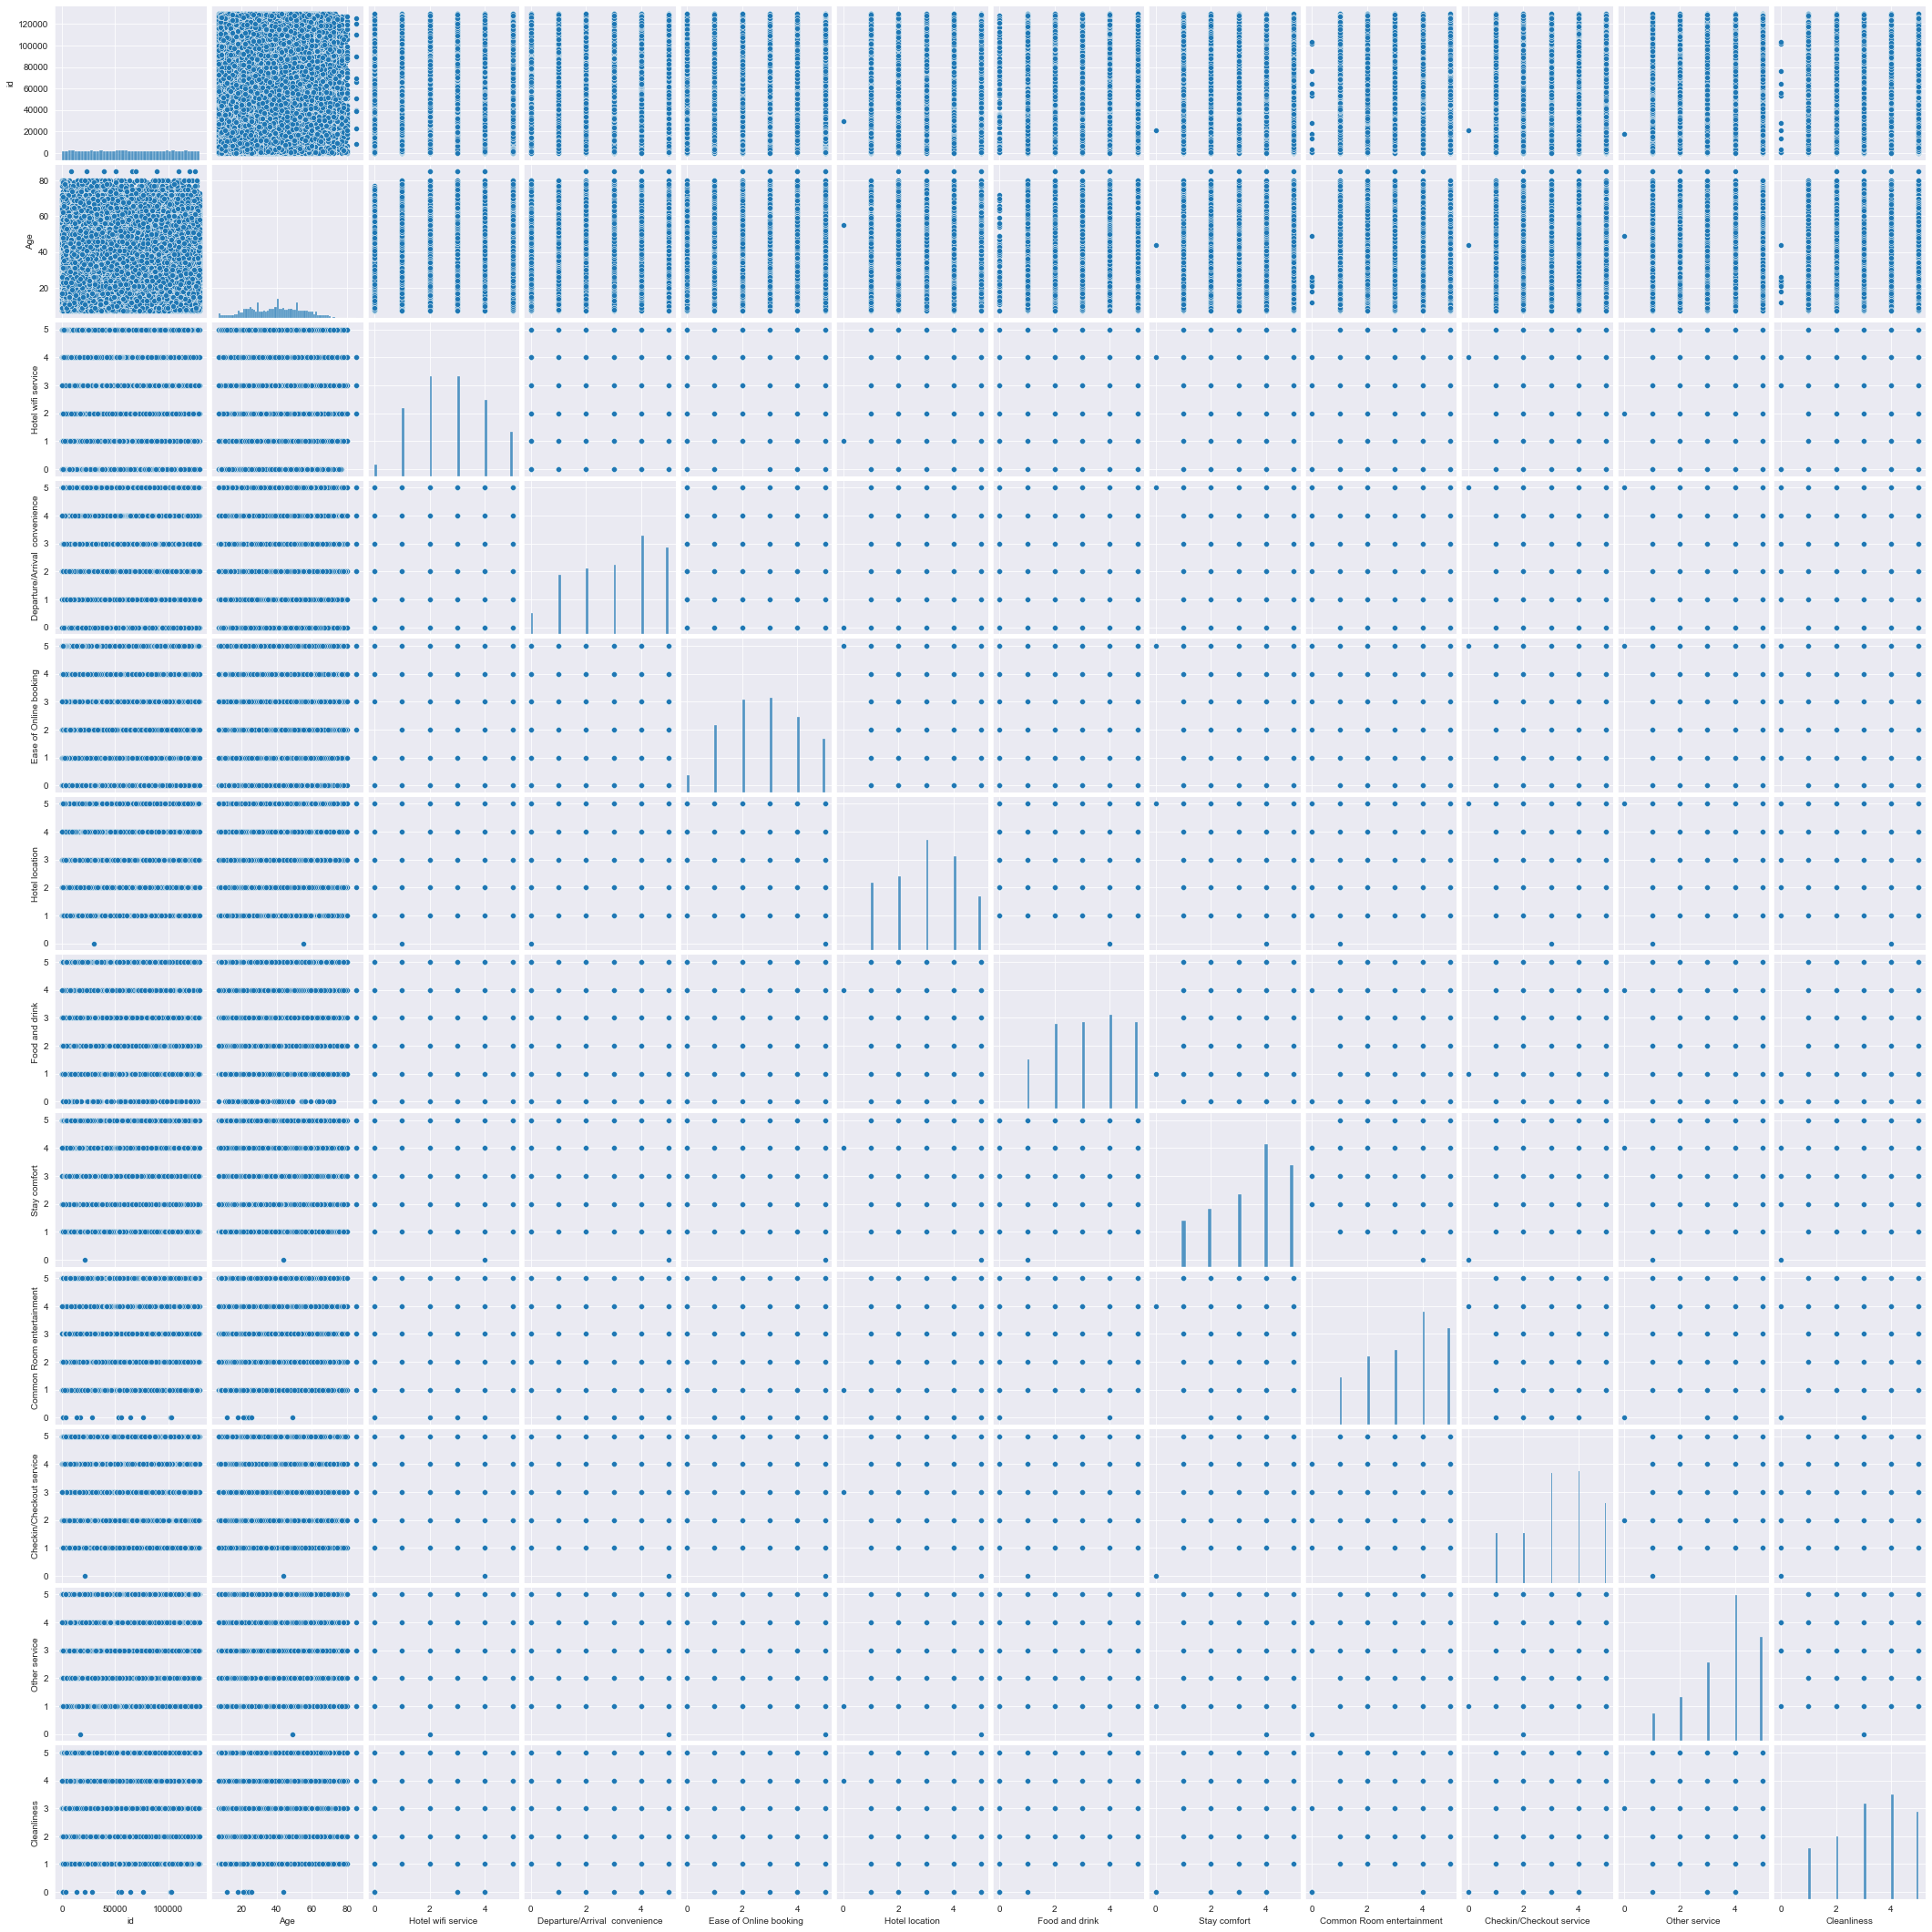

In [10]:
sns.pairplot(train)
plt.show()

<AxesSubplot:xlabel='Gender', ylabel='count'>

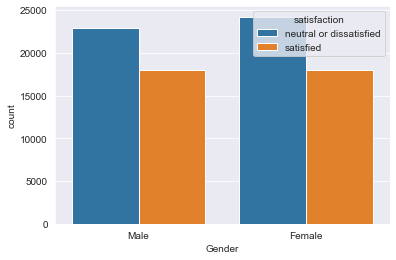

In [11]:
sns.countplot(data=train, x='Gender', hue='satisfaction')

<AxesSubplot:xlabel='purpose_of_travel', ylabel='count'>

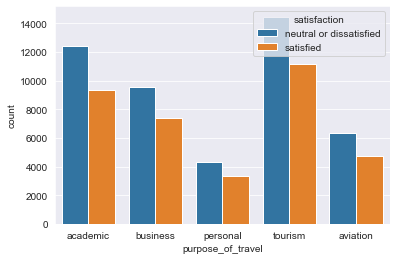

In [12]:
sns.countplot(data=train, x='purpose_of_travel', hue='satisfaction')

<AxesSubplot:xlabel='Type of Travel', ylabel='count'>

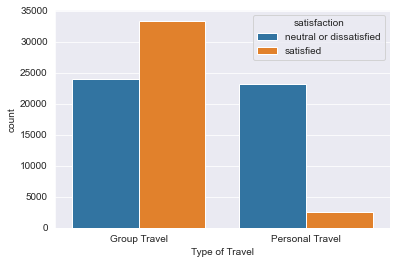

In [13]:
sns.countplot(data=train, x='Type of Travel', hue='satisfaction')

<AxesSubplot:xlabel='Type Of Booking', ylabel='count'>

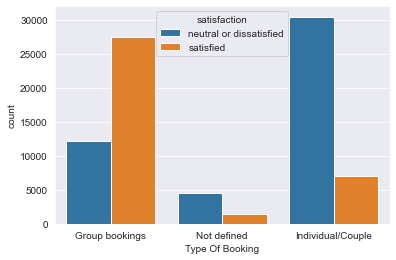

In [14]:
sns.countplot(data=train, x='Type Of Booking', hue='satisfaction')

In [15]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20781 entries, 15519 to 15780
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   id                              20781 non-null  int64 
 1   Gender                          20781 non-null  object
 2   Age                             20781 non-null  int64 
 3   purpose_of_travel               20781 non-null  object
 4   Type of Travel                  20781 non-null  object
 5   Type Of Booking                 20781 non-null  object
 6   Hotel wifi service              20781 non-null  int64 
 7   Departure/Arrival  convenience  20781 non-null  int64 
 8   Ease of Online booking          20781 non-null  int64 
 9   Hotel location                  20781 non-null  int64 
 10  Food and drink                  20781 non-null  int64 
 11  Stay comfort                    20781 non-null  int64 
 12  Common Room entertainment       20781 non-

In [16]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 83123 entries, 38494 to 61446
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   id                              83123 non-null  int64 
 1   Gender                          83123 non-null  object
 2   Age                             83123 non-null  int64 
 3   purpose_of_travel               83123 non-null  object
 4   Type of Travel                  83123 non-null  object
 5   Type Of Booking                 83123 non-null  object
 6   Hotel wifi service              83123 non-null  int64 
 7   Departure/Arrival  convenience  83123 non-null  int64 
 8   Ease of Online booking          83123 non-null  int64 
 9   Hotel location                  83123 non-null  int64 
 10  Food and drink                  83123 non-null  int64 
 11  Stay comfort                    83123 non-null  int64 
 12  Common Room entertainment       83123 non-

In [17]:
test['satisfaction'].unique()

array(['neutral or dissatisfied', 'satisfied'], dtype=object)

In [18]:
test['satisfaction'].unique()

array(['neutral or dissatisfied', 'satisfied'], dtype=object)

In [19]:
def fill_satisfied(value):
        if value == "neutral or dissatisfied":
            return 0
        else:
            return 1

In [20]:
train['satisfaction'] = train.apply(lambda x: fill_satisfied(x['satisfaction']), axis=1)
test['satisfaction'] = test.apply(lambda x: fill_satisfied(x['satisfaction']), axis=1)

In [21]:
train['satisfaction']

38494     0
87100     1
13128     1
42577     1
22721     0
         ..
52884     1
49        0
100803    1
21084     1
61446     0
Name: satisfaction, Length: 83123, dtype: int64

In [22]:
test['satisfaction']

15519    0
38277    1
95612    0
11332    0
13212    0
        ..
86427    1
66044    1
39667    0
69159    0
15780    0
Name: satisfaction, Length: 20781, dtype: int64

In [23]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 83123 entries, 38494 to 61446
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   id                              83123 non-null  int64 
 1   Gender                          83123 non-null  object
 2   Age                             83123 non-null  int64 
 3   purpose_of_travel               83123 non-null  object
 4   Type of Travel                  83123 non-null  object
 5   Type Of Booking                 83123 non-null  object
 6   Hotel wifi service              83123 non-null  int64 
 7   Departure/Arrival  convenience  83123 non-null  int64 
 8   Ease of Online booking          83123 non-null  int64 
 9   Hotel location                  83123 non-null  int64 
 10  Food and drink                  83123 non-null  int64 
 11  Stay comfort                    83123 non-null  int64 
 12  Common Room entertainment       83123 non-

In [24]:
train['Type of Travel'].unique()

array(['Group Travel', 'Personal Travel'], dtype=object)

In [25]:
train = pd.get_dummies(train, columns=["Type of Travel"])
test = pd.get_dummies(test, columns=["Type of Travel"])

In [26]:
train = pd.get_dummies(train, columns=["Gender"])
test = pd.get_dummies(test, columns=["Gender"])

In [27]:
train = pd.get_dummies(train, columns=["Type Of Booking"])
test = pd.get_dummies(test, columns=["Type Of Booking"])

In [28]:
train = pd.get_dummies(train, columns=["purpose_of_travel"])
test = pd.get_dummies(test, columns=["purpose_of_travel"])

In [29]:
train.rename({'Type of Travel_Group Travel': 'Group travel', 'Type of Travel_Personal Travel': 'Personal travel','Gender_Male':'Male','Gender_Female':'Female','Type Of Booking_Group bookings': 'Group bookings','Type Of Booking_Individual/Couple':'Individual/Couple','Type Of Booking_Not defined':'Not defined','purpose_of_travel_academic':'academic','purpose_of_travel_aviation':'aviation','purpose_of_travel_business':'business','purpose_of_travel_personal':'personal','purpose_of_travel_tourism':'tourism'}, axis=1, inplace=True)

test.rename({'Type of Travel_Group Travel': 'Group travel', 'Type of Travel_Personal Travel': 'Personal travel','Gender_Male':'Male','Gender_Female':'Female','Type Of Booking_Group bookings': 'Group bookings','Type Of Booking_Individual/Couple':'Individual/Couple','Type Of Booking_Not defined':'Not defined','purpose_of_travel_academic':'academic','purpose_of_travel_aviation':'aviation','purpose_of_travel_business':'business','purpose_of_travel_personal':'personal','purpose_of_travel_tourism':'tourism'}, axis=1, inplace=True)

In [30]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 83123 entries, 38494 to 61446
Data columns (total 25 columns):
 #   Column                          Non-Null Count  Dtype
---  ------                          --------------  -----
 0   id                              83123 non-null  int64
 1   Age                             83123 non-null  int64
 2   Hotel wifi service              83123 non-null  int64
 3   Departure/Arrival  convenience  83123 non-null  int64
 4   Ease of Online booking          83123 non-null  int64
 5   Hotel location                  83123 non-null  int64
 6   Food and drink                  83123 non-null  int64
 7   Stay comfort                    83123 non-null  int64
 8   Common Room entertainment       83123 non-null  int64
 9   Checkin/Checkout service        83123 non-null  int64
 10  Other service                   83123 non-null  int64
 11  Cleanliness                     83123 non-null  int64
 12  satisfaction                    83123 non-null  int64
 1

In [31]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20781 entries, 15519 to 15780
Data columns (total 25 columns):
 #   Column                          Non-Null Count  Dtype
---  ------                          --------------  -----
 0   id                              20781 non-null  int64
 1   Age                             20781 non-null  int64
 2   Hotel wifi service              20781 non-null  int64
 3   Departure/Arrival  convenience  20781 non-null  int64
 4   Ease of Online booking          20781 non-null  int64
 5   Hotel location                  20781 non-null  int64
 6   Food and drink                  20781 non-null  int64
 7   Stay comfort                    20781 non-null  int64
 8   Common Room entertainment       20781 non-null  int64
 9   Checkin/Checkout service        20781 non-null  int64
 10  Other service                   20781 non-null  int64
 11  Cleanliness                     20781 non-null  int64
 12  satisfaction                    20781 non-null  int64
 1

In [32]:
train.head()

,id,Age,Hotel wifi service,Departure/Arrival convenience,Ease of Online booking,Hotel location,Food and drink,Stay comfort,Common Room entertainment,Checkin/Checkout service,...,Female,Male,Group bookings,Individual/Couple,Not defined,academic,aviation,business,personal,tourism
38494,810,26,3,1,3,3,3,3,3,3,...,0,1,1,0,0,1,0,0,0,0
87100,38212,45,3,4,4,4,5,4,4,1,...,1,0,0,0,1,0,0,1,0,0
13128,17153,31,5,5,5,5,5,5,5,5,...,1,0,1,0,0,0,0,0,1,0
42577,96185,47,3,3,3,3,4,4,5,3,...,0,1,1,0,0,0,0,0,0,1
22721,41550,54,3,3,3,3,1,1,1,1,...,0,1,0,1,0,0,0,1,0,0


In [33]:
X_train_validation = train.sample(10000, random_state=1)
y_train_validation = X_train_validation['satisfaction']
del X_train_validation['satisfaction']

In [34]:
train = train.sample(10000, random_state=1)
y_train = train['satisfaction']
del train['satisfaction']

In [35]:
train.head()

,id,Age,Hotel wifi service,Departure/Arrival convenience,Ease of Online booking,Hotel location,Food and drink,Stay comfort,Common Room entertainment,Checkin/Checkout service,...,Female,Male,Group bookings,Individual/Couple,Not defined,academic,aviation,business,personal,tourism
87390,11203,15,2,2,2,4,5,5,5,2,...,1,0,0,1,0,1,0,0,0,0
40269,23832,43,3,4,3,4,2,5,2,4,...,1,0,0,1,0,0,0,0,0,1
63614,91621,41,3,1,1,1,2,2,2,2,...,1,0,0,1,0,0,0,0,1,0
38678,7110,30,2,5,1,4,4,1,4,1,...,0,1,0,1,0,0,0,1,0,0
60612,41084,43,2,2,2,2,3,5,4,4,...,0,1,1,0,0,0,0,1,0,0


In [36]:
X_train = train

In [37]:
y_test = test['satisfaction']

In [38]:
del test['satisfaction']

In [39]:
test.head()

,id,Age,Hotel wifi service,Departure/Arrival convenience,Ease of Online booking,Hotel location,Food and drink,Stay comfort,Common Room entertainment,Checkin/Checkout service,...,Female,Male,Group bookings,Individual/Couple,Not defined,academic,aviation,business,personal,tourism
15519,59097,10,4,0,4,3,4,2,4,2,...,0,1,0,1,0,0,0,1,0,0
38277,87114,33,4,1,4,4,4,4,4,3,...,1,0,0,1,0,0,0,0,0,1
95612,118861,35,2,3,2,3,3,3,3,1,...,0,1,0,0,1,1,0,0,0,0
11332,62552,26,2,2,2,4,4,4,4,4,...,1,0,1,0,0,0,1,0,0,0
13212,86938,36,3,5,5,5,4,3,3,3,...,1,0,1,0,0,0,0,1,0,0


In [40]:
X_test = test

MODELOWANIE

In [60]:
from sklearn.model_selection import StratifiedKFold

seed=123
kfold = StratifiedKFold(n_splits=5, random_state=seed, shuffle=True)
models = {}

In [51]:
pipe1 = Pipeline([
    ('preprocessing', StandardScaler()),
    ('classifier', LogisticRegression(C=1, solver='newton-cg'))])

param_grid_1 = {'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100]}

grid_1 = GridSearchCV(pipe1, param_grid_1, cv=kfold, return_train_score=True)

grid_1.fit(X_train, y_train)
grid_1.best_params_

{'classifier__C': 0.01}

In [52]:
pipe_2 = Pipeline([('preprocessing', StandardScaler()),
                   ('classifier', SVC(kernel='linear'))])

param_grid_2 = {'classifier__C': [0.001, 0.01, 0.1, 1],
              'classifier__gamma': [0.001, 0.01, 0.1, 1]}

grid_2 = GridSearchCV(pipe_2, param_grid_2, cv=kfold, return_train_score=True)

grid_2.fit(X_train, y_train)
grid_2.best_params_

{'classifier__C': 0.01, 'classifier__gamma': 0.001}

In [53]:
from sklearn.ensemble import RandomForestClassifier

pipe_3 = Pipeline([('preprocessing', StandardScaler()),
                   ('classifier', RandomForestClassifier(n_estimators=500, max_leaf_nodes=16))])

param_grid_3 = {'classifier__n_estimators': [10, 50, 100],
              'classifier__max_leaf_nodes': [10, 20],
              'classifier__max_depth': [10, 20]}

grid_3 = GridSearchCV(pipe_3, param_grid_3, cv=kfold, return_train_score=True)

grid_3.fit(X_train, y_train)
grid_3.best_params_

{'classifier__max_depth': 20,
 'classifier__max_leaf_nodes': 20,
 'classifier__n_estimators': 50}

In [54]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
pipe_4 = Pipeline([('preprocessing', StandardScaler()),
                   ('classifier', AdaBoostClassifier(
                       DecisionTreeClassifier(random_state=42),
                       n_estimators=500,
                       learning_rate=0.5))])

param_grid_4 = {'classifier__n_estimators': [10,50,100],
              'classifier__learning_rate': [0.1, 0.2, 0.3,0.5,0.6,0.7,0.8,0.9]}

grid_4 = GridSearchCV(pipe_4, param_grid_4, cv=kfold, return_train_score=True)

grid_4.fit(X_train, y_train)
grid_4.best_params_

{'classifier__learning_rate': 0.6, 'classifier__n_estimators': 100}

In [55]:
from sklearn.neighbors import KNeighborsClassifier
pipe_5 = Pipeline([('preprocessing', StandardScaler()),
                   ('classifier', KNeighborsClassifier())])

param_grid_5 = {
    'preprocessing': [MinMaxScaler(), StandardScaler(), None],
    'classifier__n_neighbors': [1, 2, 3, 5, 10, 100]}

grid_5 = GridSearchCV(pipe_5, param_grid_5, cv=kfold, return_train_score=True)
grid_5.fit(X_train, y_train)
grid_5.best_params_

{'classifier__n_neighbors': 3, 'preprocessing': StandardScaler()}

In [59]:
pipe_6 = Pipeline([('preprocessing', StandardScaler()), ('classifier',
                                                         DecisionTreeClassifier(random_state=0))])
param_grid_6 = {'preprocessing': [MinMaxScaler(), StandardScaler(), None],
    'classifier__max_depth': [1, 2, 5, 10, 100],
    'classifier__min_samples_leaf': [1, 2, 4, 10]}

grid_6 = GridSearchCV(pipe_6, param_grid_6, cv=kfold, return_train_score=True)

grid_6.fit(X_train, y_train)
grid_6.best_params_

{'classifier__max_depth': 10,
 'classifier__min_samples_leaf': 4,
 'preprocessing': StandardScaler()}

In [62]:
from sklearn.ensemble import ExtraTreesClassifier
pipe_7 = Pipeline([('preprocessing', StandardScaler()),
                 ('classifier', ExtraTreesClassifier(n_jobs=-1, random_state=42))])
param_grid_7 = {'preprocessing': [MinMaxScaler(), StandardScaler(), None],
    'classifier__n_estimators': [50, 100, 500, 1000],
    'classifier__max_leaf_nodes': [4, 8, 16, 64]}

grid_7 = GridSearchCV(pipe_7, param_grid_7, cv=kfold, return_train_score=True)
grid_7.fit(X_train, y_train)
grid_7.best_params_

{'classifier__max_leaf_nodes': 64,
 'classifier__n_estimators': 50,
 'preprocessing': MinMaxScaler()}

In [68]:
from sklearn import  metrics

models = []
models.append(('LR', grid_1.best_estimator_))
models.append(('SVC linear', grid_2.best_estimator_))
models.append(('RandomForest', grid_3.best_estimator_))
models.append(('AdaBoost', grid_4.best_estimator_))
models.append(('KNeighbours', grid_5.best_estimator_))
models.append(('DecisionTree', grid_6.best_estimator_))
models.append(('ExtraTrees', grid_7.best_estimator_))

precision_score = []
recall_score = []
f1_score = []
accuracy_score = []
for name, model in models:
  print(name)
  print("precision_score: {}".format(metrics.precision_score(y_test, model.predict(X_test), average='micro')))
  print("recall_score: {}".format(metrics.recall_score(y_test, model.predict(X_test), average='micro')))
  print("f1_score: {}".format(metrics.f1_score(y_test, model.predict(X_test), average='micro')))
  print("accuracy_score: {}".format(metrics.accuracy_score(y_test, model.predict(X_test))))
  precision_score.append(metrics.precision_score(y_test, model.predict(X_test), average='micro'))
  recall_score.append(metrics.recall_score(y_test, model.predict(X_test), average='micro'))
  f1_score.append(metrics.f1_score(y_test, model.predict(X_test), average='micro'))
  accuracy_score.append(metrics.accuracy_score(y_test, model.predict(X_test)))

LR
precision_score: 0.8448582840094316
recall_score: 0.8448582840094316
f1_score: 0.8448582840094316
accuracy_score: 0.8448582840094316
SVC linear
precision_score: 0.8454357345652278
recall_score: 0.8454357345652278
f1_score: 0.8454357345652278
accuracy_score: 0.8454357345652278
RandomForest
precision_score: 0.8937490977335065
recall_score: 0.8937490977335065
f1_score: 0.8937490977335065
accuracy_score: 0.8937490977335065
AdaBoost
precision_score: 0.9141523507049709
recall_score: 0.9141523507049709
f1_score: 0.9141523507049709
accuracy_score: 0.9141523507049709
KNeighbours
precision_score: 0.8708916798999086
recall_score: 0.8708916798999086
f1_score: 0.8708916798999086
accuracy_score: 0.8708916798999086
DecisionTree
precision_score: 0.9205524276983783
recall_score: 0.9205524276983783
f1_score: 0.9205524276983783
accuracy_score: 0.9205524276983783
ExtraTrees
precision_score: 0.892931042779462
recall_score: 0.892931042779462
f1_score: 0.892931042779462
accuracy_score: 0.892931042779462


In [69]:
import pandas as pd
d = {'precision_score': precision_score,
     'recall_score': recall_score,
     'f1_score': f1_score,
     'accuracy_score' : accuracy_score
    }
df = pd.DataFrame(data=d)
df.insert(loc=0, column='Method', value=['LR', 'SVC linear', "RandomForest" ,"AdaBoost", "KNeighbours", "DecisionTree", "ExtraTrees"])
df

,Method,precision_score,recall_score,f1_score,accuracy_score
0,LR,0.844858,0.844858,0.844858,0.844858
1,SVC linear,0.845436,0.845436,0.845436,0.845436
2,RandomForest,0.893749,0.893749,0.893749,0.893749
3,AdaBoost,0.914152,0.914152,0.914152,0.914152
4,KNeighbours,0.870892,0.870892,0.870892,0.870892
5,DecisionTree,0.920552,0.920552,0.920552,0.920552
6,ExtraTrees,0.892931,0.892931,0.892931,0.892931


LR
SVC linear
RandomForest
AdaBoost
KNeighbours
DecisionTree
ExtraTrees


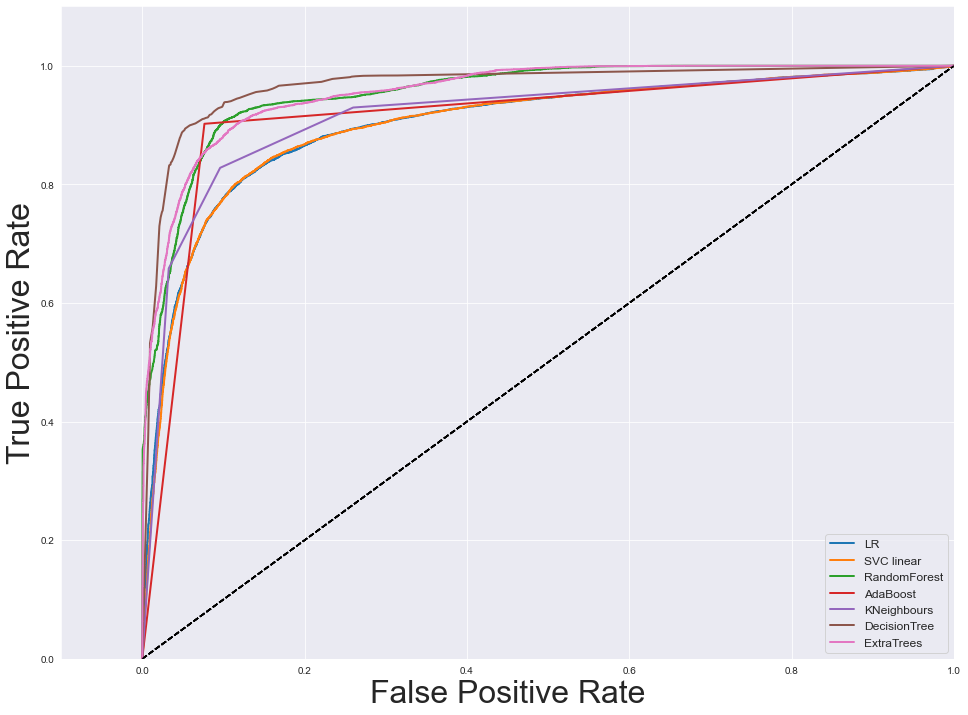

In [70]:
from sklearn.metrics import roc_curve

def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([-0.1, 1, 0, 1.1])
    plt.xlabel('False Positive Rate', fontsize=32)
    plt.ylabel('True Positive Rate', fontsize=32)

plt.figure(figsize=(16, 12))
for name, model in models:
    print(name)
    if name == 'SVC linear':
        y_scores = model.decision_function(X_test)
    else:
        y_scores = model.predict_proba(X_test)[:,1]
    fpr, tpr, thresholds = roc_curve(y_test, y_scores)
    plot_roc_curve(fpr, tpr, name)

plt.legend(loc="lower right", fontsize=12)
plt.show()

SIECI NEURONOWE

In [77]:
from keras.models import Sequential
from keras.layers import Dense
from keras.backend import clear_session
from keras.callbacks import EarlyStopping
from keras.callbacks import History

clear_session()
earlyStopping = EarlyStopping(monitor='loss', patience=20)
deep_model_1 = Sequential()
deep_model_1.add(Dense(25,activation="relu",input_shape=(X_train.shape[1],)))
deep_model_1.add(Dense(1,activation="sigmoid"))
deep_model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 25)                625       
                                                                 
 dense_1 (Dense)             (None, 1)                 26        
                                                                 
Total params: 651
Trainable params: 651
Non-trainable params: 0
_________________________________________________________________


Epoch 1/100
313/313 [==============================] - 2s 3ms/step - loss: 50.6333 - accuracy: 0.5131 - val_loss: 2.7153 - val_accuracy: 0.5619
Epoch 2/100
313/313 [==============================] - 1s 2ms/step - loss: 19.3845 - accuracy: 0.5226 - val_loss: 3.5784 - val_accuracy: 0.5814
Epoch 3/100
313/313 [==============================] - 1s 2ms/step - loss: 17.7954 - accuracy: 0.5222 - val_loss: 30.4940 - val_accuracy: 0.5706
Epoch 4/100
313/313 [==============================] - 1s 2ms/step - loss: 16.5869 - accuracy: 0.5405 - val_loss: 41.4062 - val_accuracy: 0.5696
Epoch 5/100
313/313 [==============================] - 1s 2ms/step - loss: 14.5933 - accuracy: 0.5399 - val_loss: 1.0752 - val_accuracy: 0.6862
Epoch 6/100
313/313 [==============================] - 1s 2ms/step - loss: 15.7499 - accuracy: 0.5498 - val_loss: 7.8804 - val_accuracy: 0.5920
Epoch 7/100
313/313 [==============================] - 1s 2ms/step - loss: 13.5538 - accuracy: 0.5669 - val_loss: 1.7799 - val_accurac

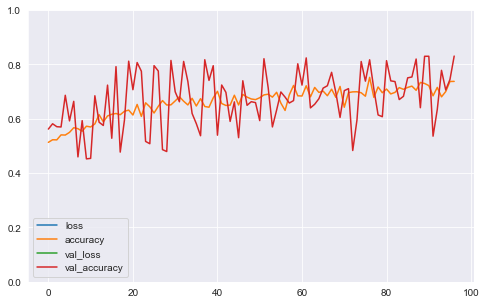

313/313 [==============================] - 0s 995us/step - loss: 2.0526 - accuracy: 0.8305


[2.0526421070098877, 0.8305000066757202]

In [78]:
deep_model_1.compile(loss="binary_crossentropy", optimizer="Adam", metrics=["accuracy"])
history_1 = deep_model_1.fit(X_train, y_train, validation_data = (X_train_validation, y_train_validation), batch_size=32, epochs=100, callbacks=[earlyStopping])
pd.DataFrame(history_1.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()
deep_model_1.evaluate(X_train_validation, y_train_validation)

In [79]:
clear_session()
deep_model_2 = Sequential()
deep_model_2.add(Dense(25,activation="relu",input_shape=(X_train.shape[1],)))
deep_model_2.add(Dense(10,activation="relu"))
deep_model_2.add(Dense(1,activation="sigmoid"))
deep_model_2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 25)                625       
                                                                 
 dense_1 (Dense)             (None, 10)                260       
                                                                 
 dense_2 (Dense)             (None, 1)                 11        
                                                                 
Total params: 896
Trainable params: 896
Non-trainable params: 0
_________________________________________________________________


Epoch 1/100
313/313 [==============================] - 1s 3ms/step - loss: 580.0049 - accuracy: 0.5140 - val_loss: 8.3255 - val_accuracy: 0.4369
Epoch 2/100
313/313 [==============================] - 1s 2ms/step - loss: 15.1041 - accuracy: 0.5065 - val_loss: 1.1461 - val_accuracy: 0.5902
Epoch 3/100
313/313 [==============================] - 1s 2ms/step - loss: 23.0764 - accuracy: 0.5133 - val_loss: 1.0527 - val_accuracy: 0.6230
Epoch 4/100
313/313 [==============================] - 1s 2ms/step - loss: 20.4597 - accuracy: 0.5210 - val_loss: 2.5830 - val_accuracy: 0.5949
Epoch 5/100
313/313 [==============================] - 1s 2ms/step - loss: 24.4538 - accuracy: 0.5240 - val_loss: 13.2461 - val_accuracy: 0.4403
Epoch 6/100
313/313 [==============================] - 1s 2ms/step - loss: 17.0090 - accuracy: 0.5274 - val_loss: 2.7717 - val_accuracy: 0.6081
Epoch 7/100
313/313 [==============================] - 1s 2ms/step - loss: 17.1987 - accuracy: 0.5399 - val_loss: 20.5190 - val_accura

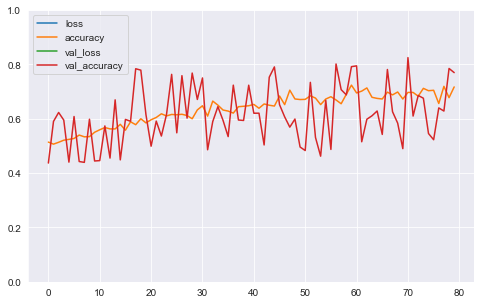

313/313 [==============================] - 0s 984us/step - loss: 2.3541 - accuracy: 0.7696


[2.3541147708892822, 0.769599974155426]

In [80]:
deep_model_2.compile(loss="binary_crossentropy", optimizer="Adam", metrics=["accuracy"])
history_2 = deep_model_2.fit(X_train, y_train, validation_data = (X_train_validation, y_train_validation), batch_size=32, epochs=100, callbacks=[earlyStopping])
pd.DataFrame(history_2.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()
deep_model_2.evaluate(X_train_validation, y_train_validation)

In [81]:
clear_session()
deep_model_3 = Sequential()
deep_model_3.add(Dense(25,activation="relu",input_shape=(X_train.shape[1],)))
deep_model_3.add(Dense(10,activation="relu"))
deep_model_3.add(Dense(5,activation="relu"))
deep_model_3.add(Dense(1,activation="sigmoid"))
deep_model_3.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 25)                625       
                                                                 
 dense_1 (Dense)             (None, 10)                260       
                                                                 
 dense_2 (Dense)             (None, 5)                 55        
                                                                 
 dense_3 (Dense)             (None, 1)                 6         
                                                                 
Total params: 946
Trainable params: 946
Non-trainable params: 0
_________________________________________________________________


Epoch 1/100
313/313 [==============================] - 1s 3ms/step - loss: 65.1000 - accuracy: 0.5231 - val_loss: 17.0308 - val_accuracy: 0.4389
Epoch 2/100
313/313 [==============================] - 1s 2ms/step - loss: 36.3434 - accuracy: 0.5108 - val_loss: 20.1968 - val_accuracy: 0.4377
Epoch 3/100
313/313 [==============================] - 1s 2ms/step - loss: 43.4175 - accuracy: 0.5104 - val_loss: 23.3028 - val_accuracy: 0.5724
Epoch 4/100
313/313 [==============================] - 1s 2ms/step - loss: 40.9157 - accuracy: 0.5327 - val_loss: 56.7060 - val_accuracy: 0.4373
Epoch 5/100
313/313 [==============================] - 1s 2ms/step - loss: 45.4543 - accuracy: 0.5314 - val_loss: 0.8839 - val_accuracy: 0.7218
Epoch 6/100
313/313 [==============================] - 1s 2ms/step - loss: 34.7625 - accuracy: 0.5235 - val_loss: 18.4677 - val_accuracy: 0.5814
Epoch 7/100
313/313 [==============================] - 1s 2ms/step - loss: 38.3248 - accuracy: 0.5347 - val_loss: 2.3649 - val_accu

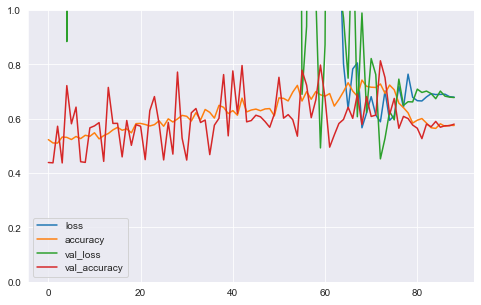

313/313 [==============================] - 1s 2ms/step - loss: 0.6780 - accuracy: 0.5801


[0.6779802441596985, 0.5800999999046326]

In [82]:
deep_model_3.compile(loss="binary_crossentropy", optimizer="Adam", metrics=["accuracy"])
history_3 = deep_model_3.fit(X_train, y_train, validation_data = (X_train_validation, y_train_validation), batch_size=32, epochs=100, callbacks=[earlyStopping])
pd.DataFrame(history_3.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()
deep_model_3.evaluate(X_train_validation, y_train_validation)

In [83]:
clear_session()
deep_model_4 = Sequential()
deep_model_4.add(Dense(50,activation="relu",input_shape=(X_train.shape[1],)))
deep_model_4.add(Dense(25,activation="relu"))
deep_model_4.add(Dense(15,activation="relu"))
deep_model_4.add(Dense(10,activation="relu"))
deep_model_4.add(Dense(1,activation="sigmoid"))
deep_model_4.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 50)                1250      
                                                                 
 dense_1 (Dense)             (None, 25)                1275      
                                                                 
 dense_2 (Dense)             (None, 15)                390       
                                                                 
 dense_3 (Dense)             (None, 10)                160       
                                                                 
 dense_4 (Dense)             (None, 1)                 11        
                                                                 
Total params: 3,086
Trainable params: 3,086
Non-trainable params: 0
_________________________________________________________________


Epoch 1/100
313/313 [==============================] - 2s 2ms/step - loss: 49.3843 - accuracy: 0.5110 - val_loss: 6.5577 - val_accuracy: 0.5660
Epoch 2/100
313/313 [==============================] - 1s 2ms/step - loss: 35.6330 - accuracy: 0.5129 - val_loss: 28.1594 - val_accuracy: 0.5647
Epoch 3/100
313/313 [==============================] - 1s 2ms/step - loss: 24.7403 - accuracy: 0.5218 - val_loss: 25.4045 - val_accuracy: 0.5669
Epoch 4/100
313/313 [==============================] - 1s 2ms/step - loss: 34.3145 - accuracy: 0.5148 - val_loss: 132.0299 - val_accuracy: 0.4374
Epoch 5/100
313/313 [==============================] - 1s 2ms/step - loss: 23.8914 - accuracy: 0.5144 - val_loss: 1.9574 - val_accuracy: 0.5944
Epoch 6/100
313/313 [==============================] - 1s 2ms/step - loss: 20.5177 - accuracy: 0.5229 - val_loss: 16.3903 - val_accuracy: 0.5704
Epoch 7/100
313/313 [==============================] - 1s 2ms/step - loss: 25.0515 - accuracy: 0.5228 - val_loss: 33.8621 - val_acc

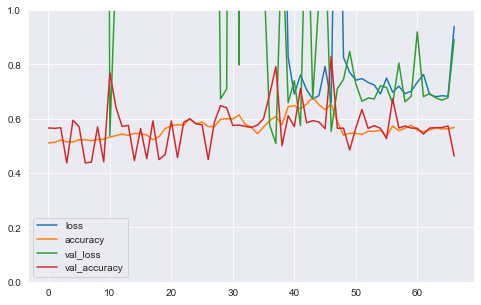

313/313 [==============================] - 0s 1ms/step - loss: 0.8914 - accuracy: 0.4622


[0.8914342522621155, 0.46219998598098755]

In [84]:
deep_model_4.compile(loss="binary_crossentropy", optimizer="Adam", metrics=["accuracy"])
history_4 = deep_model_4.fit(X_train, y_train, validation_data = (X_train_validation, y_train_validation), batch_size=32, epochs=100, callbacks=[earlyStopping])
pd.DataFrame(history_4.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()
deep_model_4.evaluate(X_train_validation, y_train_validation)

In [85]:
from tensorflow.python.keras.layers import Dropout

clear_session()
deep_model_5 = Sequential()
deep_model_5.add(Dense(50,activation="relu",input_shape=(X_train.shape[1],)))
deep_model_5.add(Dropout(0.4))
deep_model_5.add(Dense(25,activation="sigmoid"))
deep_model_5.add(Dropout(0.4))
deep_model_5.add(Dense(15,activation="sigmoid"))
deep_model_5.add(Dropout(0.4))
deep_model_5.add(Dense(10,activation="sigmoid"))
deep_model_5.add(Dropout(0.4))
deep_model_5.add(Dense(1,activation="sigmoid"))
deep_model_5.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 50)                1250      
                                                                 
 module_wrapper (ModuleWrapp  (None, 50)               0         
 er)                                                             
                                                                 
 dense_1 (Dense)             (None, 25)                1275      
                                                                 
 module_wrapper_1 (ModuleWra  (None, 25)               0         
 pper)                                                           
                                                                 
 dense_2 (Dense)             (None, 15)                390       
                                                                 
 module_wrapper_2 (ModuleWra  (None, 15)               0

Epoch 1/100
313/313 [==============================] - 2s 3ms/step - loss: 0.7312 - accuracy: 0.5235 - val_loss: 0.6852 - val_accuracy: 0.5632
Epoch 2/100
313/313 [==============================] - 1s 2ms/step - loss: 0.7045 - accuracy: 0.5360 - val_loss: 0.6852 - val_accuracy: 0.5632
Epoch 3/100
313/313 [==============================] - 1s 2ms/step - loss: 0.6961 - accuracy: 0.5360 - val_loss: 0.6851 - val_accuracy: 0.5632
Epoch 4/100
313/313 [==============================] - 1s 2ms/step - loss: 0.6916 - accuracy: 0.5424 - val_loss: 0.6852 - val_accuracy: 0.5632
Epoch 5/100
313/313 [==============================] - 1s 2ms/step - loss: 0.6884 - accuracy: 0.5531 - val_loss: 0.6851 - val_accuracy: 0.5632
Epoch 6/100
313/313 [==============================] - 1s 2ms/step - loss: 0.6879 - accuracy: 0.5541 - val_loss: 0.6852 - val_accuracy: 0.5632
Epoch 7/100
313/313 [==============================] - 1s 2ms/step - loss: 0.6873 - accuracy: 0.5625 - val_loss: 0.6853 - val_accuracy: 0.5632

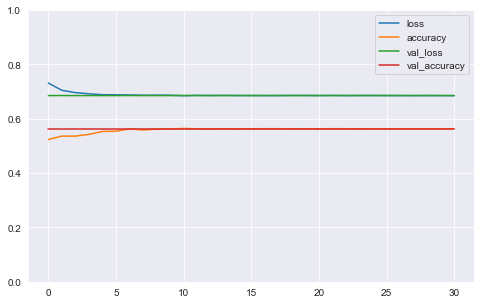

313/313 [==============================] - 0s 1ms/step - loss: 0.6851 - accuracy: 0.5632


[0.6851386427879333, 0.5631999969482422]

In [86]:
deep_model_5.compile(loss="binary_crossentropy", optimizer="Adam", metrics=["accuracy"])
history_5 = deep_model_5.fit(X_train, y_train, validation_data = (X_train_validation, y_train_validation), batch_size=32, epochs=100, callbacks=[earlyStopping])
pd.DataFrame(history_5.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()
deep_model_5.evaluate(X_train_validation, y_train_validation)

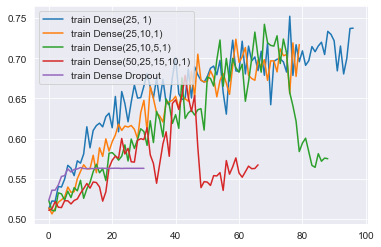

In [87]:
plt.plot(history_1.history['accuracy'], label = "train Dense(25, 1)")

plt.plot(history_2.history['accuracy'], label = "train Dense(25,10,1)")

plt.plot(history_3.history['accuracy'], label = "train Dense(25,10,5,1)")

plt.plot(history_4.history['accuracy'], label = "train Dense(50,25,15,10,1)")

plt.plot(history_5.history['accuracy'], label = "train Dense Dropout")

plt.legend()
plt.show()

In [90]:
from sklearn import  metrics


models = []
models.append(('Dense(25, 1)', deep_model_1))
models.append(('Dense(25,10,1)', deep_model_2))
models.append(('Dense(25,10,5,1)', deep_model_3))
models.append(('Dense(50,25,15,10,1)', deep_model_4))
models.append(('Dense Dropout', deep_model_5))

accuracies = []
for name, model in models:
    print(name)
    y_pred = predictions = (model.predict(X_test) > 0.5).astype("int32")
    accuracy = metrics.accuracy_score(y_test, y_pred)
    print('Accuracy: {}'.format(accuracy))
    accuracies.append(accuracy)

Dense(25, 1)
650/650 [==============================] - 1s 741us/step
Accuracy: 0.8288821519657379
Dense(25,10,1)
650/650 [==============================] - 1s 753us/step
Accuracy: 0.7686348106443386
Dense(25,10,5,1)
650/650 [==============================] - 1s 985us/step
Accuracy: 0.5789904239449497
Dense(50,25,15,10,1)
650/650 [==============================] - 1s 932us/step
Accuracy: 0.4575333237091574
Dense Dropout
650/650 [==============================] - 1s 808us/step
Accuracy: 0.5646022809296954


In [91]:
import pandas as pd
d = {'accuracy' : accuracies}
df = pd.DataFrame(data=d)
df.insert(loc=0, column='Method', value=['Dense(25, 1)', 'Dense(25,10,1)', 'Dense(25,10,5,1)', 'Dense(50,25,15,10,1)', 'Dense Dropout'])
df

,Method,accuracy
0,"Dense(25, 1)",0.828882
1,"Dense(25,10,1)",0.768635
2,"Dense(25,10,5,1)",0.578990
3,"Dense(50,25,15,10,1)",0.457533
4,Dense Dropout,0.564602


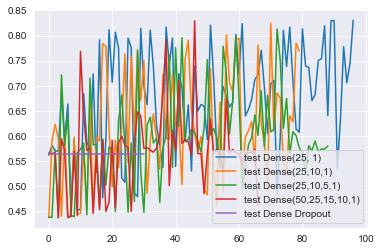

In [92]:
plt.plot(history_1.history['val_accuracy'], label = "test Dense(25, 1)")

plt.plot(history_2.history['val_accuracy'], label = "test Dense(25,10,1)")

plt.plot(history_3.history['val_accuracy'], label = "test Dense(25,10,5,1)")

plt.plot(history_4.history['val_accuracy'], label = "test Dense(50,25,15,10,1)")

plt.plot(history_5.history['val_accuracy'], label = "test Dense Dropout")

plt.legend()
plt.show()